In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
pip install nltk

In [9]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [10]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\data_analysis.csv")
df.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_14800\2391334743.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\User\\Desktop\\data_analysis.csv")


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406397735792791556,1406397735792791556,2021-06-20 05:15:24 IST,2021-06-20,05:15:24,530,16001827,spj_tweets,Society of Professional Journalists,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406057066058313733,1406057066058313733,2021-06-19 06:41:42 IST,2021-06-19,06:41:42,530,1067308099,coastguardph,Philippine Coast Guard,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1405965100993986561,1405965100993986561,2021-06-19 00:36:16 IST,2021-06-19,00:36:16,530,167406704,yaelkohen,Yael Kohen,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1405935463374991366,1405935461042958338,2021-06-18 22:38:30 IST,2021-06-18,22:38:30,530,29206490,ieeeusa,IEEE-USA,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1405918849329991694,1405918849329991694,2021-06-18 21:32:29 IST,2021-06-18,21:32:29,530,31696962,dw_europe,DW Europe,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [11]:
df.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,3.911600e+04,3.911600e+04,39116.0,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.529895e+17,8.528658e+17,530.0,3.371448e+16,1.173177,6.816367,17.193936,0.284845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.753083e+17,3.752712e+17,0.0,1.677657e+17,17.406322,82.008708,325.298354,0.451346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.274159e+09,7.274159e+09,530.0,5.700000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.634323e+17,5.633892e+17,530.0,1.888285e+07,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.230327e+17,9.227345e+17,530.0,6.899645e+07,0.000000,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.170864e+18,1.170734e+18,530.0,3.269122e+08,1.000000,3.000000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.406398e+18,1.406398e+18,530.0,1.364614e+18,2319.000000,12617.000000,57425.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              39024
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          37494
video                  0
thumbnail          27974
near               39116
geo                39116
source             39116
user_rt_id         39116
user_rt            39116
retweet_id         39116
reply_to               0
retweet_date       39116
translate          39116
trans_src          39116
trans_dest         39116
dtype: int64

In [13]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [14]:
data = df.drop(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis = 1)

In [15]:
data.head(5)

,tweet,likes_count
0,Join @SPJ_IC at 6 p.m. EDT Tuesday for the nex...,9
1,"READ: Resilience, hard work, and perseverance ...",4
2,How will the shift to streaming impact movie-m...,0
3,(2/2) to gain the aptitude to find better solu...,1
4,Alexander Lukashenko is still in power in Bela...,5


In [16]:
def preprocess_text(text):

  #Tokenize the text
  tokens = word_tokenize(text.lower())

  # Remove stop words
  filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

  #Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # Join the tokens back into a string
  processed_text = ' '.join(lemmatized_tokens)
  
  return processed_text

data['tweet'] = data['tweet'].apply(preprocess_text)
data.head(5)

,tweet,likes_count
0,join @ spj_ic 6 p.m. edt tuesday next # ictalk...,9
1,"read : resilience , hard work , perseverance p...",4
2,shift streaming impact movie-making ? interest...,0
3,( 2/2 ) gain aptitude find better solution rea...,1
4,alexander lukashenko still power belarus despi...,5


In [17]:
# Perform sentiment analysis using NLTK Vader
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
  scores = analyzer.polarity_scores(text)
  if scores['pos'] > 0:
      sentiment = "Positive"
  else:
      sentiment = "Negative"
  return sentiment

data['sentiment'] = data['tweet'].apply(get_sentiment)
data.head(5)

,tweet,likes_count,sentiment
0,join @ spj_ic 6 p.m. edt tuesday next # ictalk...,9,Positive
1,"read : resilience , hard work , perseverance p...",4,Positive
2,shift streaming impact movie-making ? interest...,0,Positive
3,( 2/2 ) gain aptitude find better solution rea...,1,Positive
4,alexander lukashenko still power belarus despi...,5,Negative


In [18]:
data["sentiment"].value_counts(dropna = False)

sentiment
Positive    22945
Negative    16171
Name: count, dtype: int64

In [19]:
positive = data[data['sentiment'] == 'Positive']
print (str(round(positive.shape[0]/(data.shape[0])*100)) + "% Positive tweets")
pos = positive.shape[0]/(data.shape[0])*100

negative = data[data['sentiment'] == 'Negative']
print (str(round(negative.shape[0]/(data.shape[0])*100)) + "% Negative tweets")
neg = negative.shape[0]/data.shape[0]*100

59% Positive tweets
41% Negative tweets


([<matplotlib.patches.Wedge at 0x1f71061e060>,
 [Text(-0.29555202308361583, 1.0595513209142735, 'Positive'),
  Text(0.2955521222859688, -1.0595512932426914, 'Negative')],
 [Text(-0.161210194409245, 0.5779370841350583, '58.7%'),
  Text(0.16121024851961932, -0.577937069041468, '41.3%')])

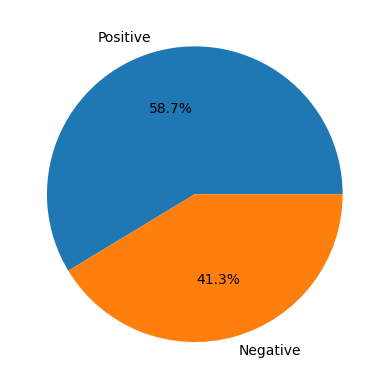

In [21]:
import matplotlib.pyplot as plt

labels = "Positive", "Negative"
sizes = [pos, neg]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')